Python implementation of: https://gist.github.com/rmcelreath/39dd410fc6bb758e54d79249b11eeb2f

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import t as studentT
from scipy.stats import norm as gaussian

In [2]:
xstep = 1000
xtoplot = np.linspace(-20,20,xstep)
normFactor = xstep / (max(xtoplot)-min(xtoplot))

In [3]:
priors = [gaussian,gaussian,studentT(df=2),studentT(df=2)]
likelihoods = [gaussian,studentT(df=2),studentT(df=2),gaussian]

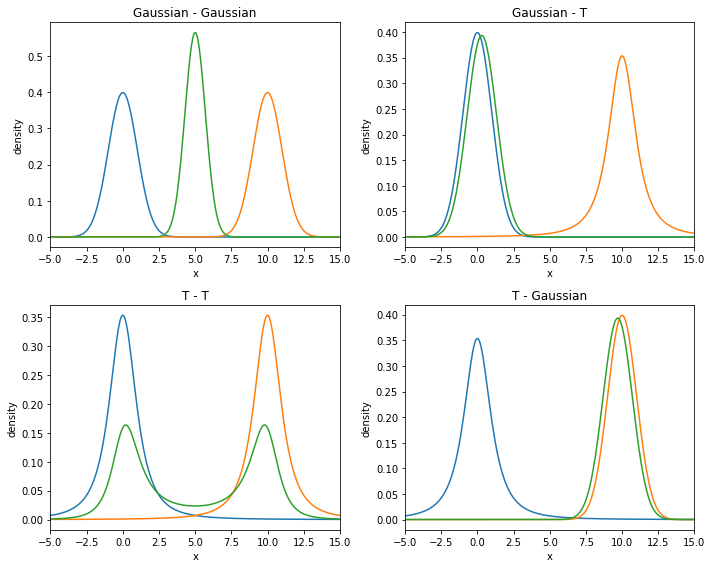

In [5]:
plt.figure(figsize=(10,8))
titles = ['Gaussian - Gaussian',
         'Gaussian - T',
         'T - T',
         'T - Gaussian']

for i in range(4):
    prior = priors[i]
    likelihood = likelihoods[i]
    
    plt.subplot(2,2,i+1)
    plt.plot( xtoplot , prior.pdf(xtoplot) )
    plt.plot( xtoplot , likelihood.pdf(xtoplot-10) )
    posterior = prior.pdf(xtoplot) * likelihood.pdf(xtoplot-10)
    posterior = normFactor * posterior / sum(posterior)
    plt.plot( xtoplot , posterior )
    
    plt.xlim(-5,15)
    plt.xlabel('x')
    plt.ylabel('density')
    
    plt.title(titles[i])
    
plt.tight_layout()

The combination of two Gaussian PDFs results in a Gaussian of smaller width. If both PDFs have the same width the combination has a width $\sqrt{2}$ smaller, and peaks in the middle of the two peaks. 

Since Gaussians have much shorter wings than T distributions, combining a Gaussian with a T produces a PDF that is very close to the Gaussian.

Combining two T distributions produces a broad and bimodal distribution.